Davies-Bouldin Index: 0.7726853895682169


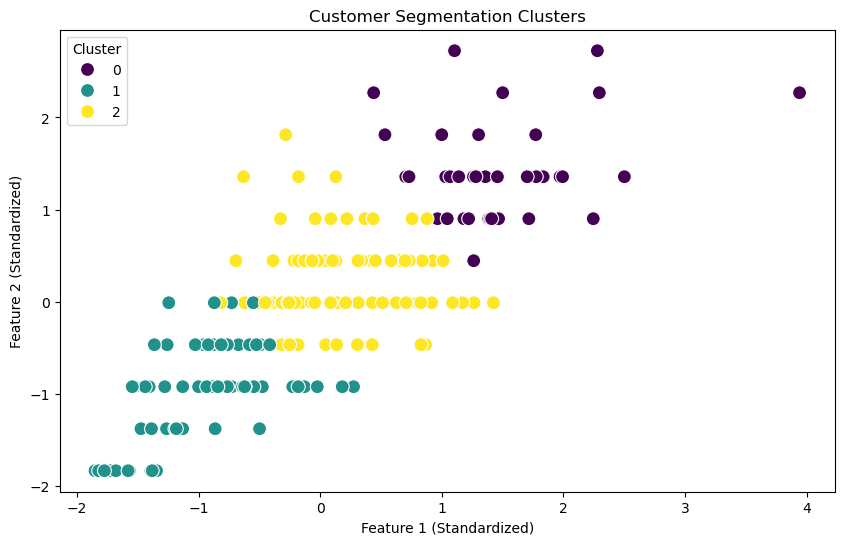

Customer segmentation results saved to Outputs/Customer_Segments.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

customers = pd.read_csv('Data/Customers.csv')
products = pd.read_csv('Data/Products.csv')
transactions = pd.read_csv('Data/Transactions.csv')


# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Prepare features for clustering
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Number of transactions
    'Quantity': 'sum'  # Total quantity purchased
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'PurchaseFrequency',
    'Quantity': 'TotalQuantity'
})

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters to test different values
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Add cluster labels to the original data
customer_features['Cluster'] = labels

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1], 
    hue=labels, palette='viridis', s=100
)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Cluster')
plt.show()

# Save clustering results
customer_features.to_csv('Outputs/Athish_Kishan_Clustering.csv')
print("Customer segmentation results saved to Outputs/Athish_Kishan_Clustering.csv")
